# 2. Lineages reconstruction

Here we will breifly explain how we can reconstruct lineages in *AdaScape*. We provide routines to build phylogenetic trees using [dendropy](https://dendropy.org/), which is a Python library to analyze phylogenetics trees. Also we use here [toytree](https://toytree.readthedocs.io/en/latest/), and [toyplot](https://toyplot.readthedocs.io/en/stable/) libraries to visualze such trees. 

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import extra_func as ext

First we start by building a simple environment as done in [the previous notebook](./2.basic_execution_ecoevomodel.ipynb).

In [2]:
length = (250, 250)
spacing = (1, 1)

x, y = np.meshgrid(*[np.arange(0, l+s, s) for l, s in zip(length, spacing)])

environment = x * 10

We then run a model, for example, without trait-mediated competition and plot the temporal and trait dynamics for visual inspection of the results

In [3]:
df1 = ext.single_model_run(environment, x, y)

<IR12SpeciationModel (individuals: not initialized)>
Parameters:
    random_seed: 1234
    always_direct_parent: True
    on_extinction: warn
    taxon_threshold: 0.075
    taxon_def: traits
    rho: 0
    r: 50
    K: 50
    sigma_f: 0.2
    sigma_d: 30
    sigma_m: 0.05
    p_m: 0.005
    sigma_u: 1.0



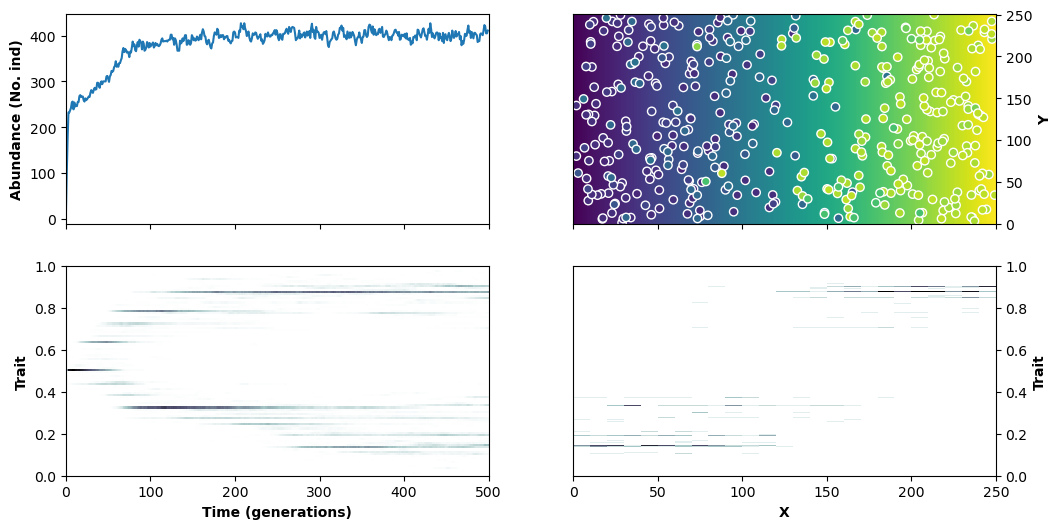

In [4]:
ext.plot_temp_dyn_1trait(df1, environment, x)

Then we can transform our taxon_id and ancestor_id information into a [dendropy.Tree](https://dendropy.org/primer/trees.html) by using our custoum-made pandas accessor **ptree** and the method **to_dendropy_tree**. 

In [5]:
tree1 = df1.ptree.to_dendropy_tree()

One ca visulize this tree using the dendropy's [print_plot](https://dendropy.org/primer/trees.html?highlight=print_plot#viewing-and-displaying-trees) method or [toytree's](https://toytree.readthedocs.io/en/latest/Cookbook.html#6.-Plot-histograms-associated-with-tip-trait-values-(ridge-plot), which we have coded into the function **toytree_plot**.

In [6]:
tree1.print_plot()

                                                    ++++++++++++++++++++++ 1186
 ++++++++++++++++++++++++++++++++++++++++++++++++++++                          
 |                                                  ++++++++++++++++++++++ 1187
++                                                                             
 |                            /----------------------------------+++++++++ 565 
 ++++++++++++++++++++++++++++++                                                
                              ++++++++++++++++++++++++++++++++++++++++++++ 1188
                                                                               
                                                                               


In [7]:
ext.toytree_plot(tree1, df1)

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="400.0px" viewBox="0 0 300.0 400.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="t8610d12def5b4e90895088912b863c62"> <polygon points="200.0,125.0 201.53061224489795,125.0 203.0612244897959,125.0 204.59183673469389,125.0 206.12244897959187,125.0 207.6530612244898,125.0 209.18367346938774,125.0 210.71428571428572,125.0 212.24489795918367,125.0 213.77551020408163,125.0 215.30612244897958,125.0 216.83673469387753,125.0 218.36734693877548,125.0 219.8979591836735,125.0 221.42857142857144,125.0 222.9591836734694,125.0 224.48979591836735,125.0 226.0204081632653,125.0 227.55102040816325,125.0 229.0816326530612,125.0 230.61224489795916,125.0 232.1428571428571,125.0 233.6734693877551,125.0 235.20408163265304,125.0 236.73469387755102,125.0 238.26530612244898,125.0 239.79591836734693,125.0 241.3265306122449,125.0 242.85714285714286,125.0 244.3877551020408,125.0 245.91836734693877,125.0 247.44897959183675,125.0 248.9795918367347,125.0 250.51020408163265,125.0 252.0408163265306,125.0 253.57142857142858,125.0 255.10204081632654,125.0 256.6326530612245,125.0 258.16326530612247,125.0 259.6938775510204,125.0 261.2244897959184,125.0 262.7551020408163,125.0 264.2857142857143,125.0 265.81632653061223,125.0 267.3469387755102,125.0 268.8775510204082,125.0 270.4081632653061,125.0 271.9387755102041,125.0 273.469387755102,125.0 275.0,125.0 275.0,125.0 273.469387755102,125.0 271.9387755102041,125.0 270.4081632653061,125.0 268.8775510204082,125.0 267.3469387755102,125.0 265.81632653061223,125.0 264.2857142857143,125.0 262.7551020408163,125.0 261.2244897959184,125.0 259.6938775510204,125.0 258.16326530612247,125.0 256.6326530612245,125.0 255.10204081632654,125.0 253.57142857142858,125.0 252.0408163265306,125.0 250.51020408163265,125.0 248.9795918367347,125.0 247.44897959183675,125.0 245.91836734693877,124.99999999999997 244.3877551020408,124.99999999999251 242.85714285714286,124.99999999886154 241.3265306122449,124.99999989471655 239.79591836734693,124.99999406173255 238.26530612244898,124.99979565801557 236.73469387755102,124.99570627839881 235.20408163265304,124.94478183766 233.6734693877551,124.56279473704794 232.1428571428571,122.83640835683688 230.61224489795916,118.06881923712089 229.0816326530612,109.6193503539509 227.55102040816325,99.25585966955612 226.0204081632653,91.19659846201004 224.48979591836735,90.87541591117706 222.9591836734694,97.8223556681111 221.42857142857144,105.16751182088124 219.8979591836735,109.48757687943144 218.36734693877548,109.43342561772793 216.83673469387753,101.10896267773114 215.30612244897958,84.54753062365666 213.77551020408163,63.709061772757124 212.24489795918367,41.45081276188534 210.71428571428572,31.25 209.18367346938774,49.41339738550786 207.6530612244898,84.06133335660664 206.12244897959187,110.17107910325416 204.59183673469389,121.31797267886002 203.0612244897959,124.35943312882034 201.53061224489795,124.92236209612281 200.0,124.99365089075852" style="fill:rgb(40%,76.1%,64.7%);fill-opacity:1.0;opacity:1.0;stroke:rgb(100%,100%,100%);stroke-opacity:1.0;stroke-width:0.5"> 1188 <polygon points="200.0,275.0 201.53061224489795,275.0 203.0612244897959,275.0 204.59183673469389,275.0 206.12244897959187,275.0 207.6530612244898,275.0 209.18367346938774,275.0 210.71428571428572,275.0 212.24489795918367,275.0 213.77551020408163,275.0 215.30612244897958,275.0 216.83673469387753,275.0 218.36734693877548,275.0 219.8979591836735,275.0 221.42857142857144,275.0 222.9591836734694,275.0 224.48979591836735,275.0 226.0204081632653,275.0 227.55102040816325,275.0 229.0816326530612,275.0 230.61224489795916,275.0 2

We can then genereate another model run, for example, with trait-mediated competition to compare the differences in lineages reconstruction.

In [8]:
df2 = ext.single_model_run(environment, x, y, sigma_u=0.20, K=30)

<IR12SpeciationModel (individuals: not initialized)>
Parameters:
    random_seed: 1234
    always_direct_parent: True
    on_extinction: warn
    taxon_threshold: 0.075
    taxon_def: traits
    rho: 0
    r: 50
    K: 30
    sigma_f: 0.2
    sigma_d: 30
    sigma_m: 0.05
    p_m: 0.005
    sigma_u: 0.2



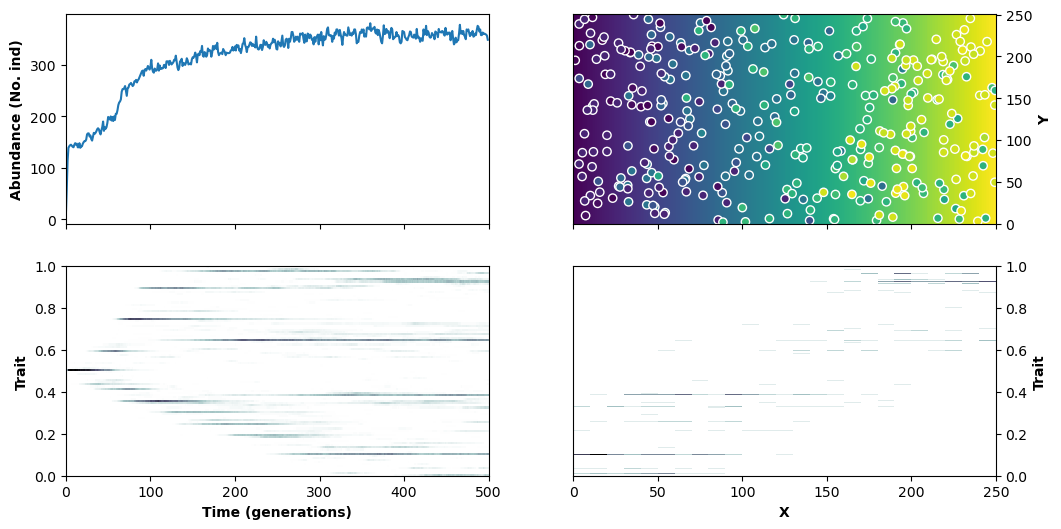

In [9]:
ext.plot_temp_dyn_1trait(df2, environment, x)

In [10]:
tree2 = df2.ptree.to_dendropy_tree()

In [11]:
tree2.print_plot()

            ++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 2406
        +++++                                                                  
        |   |    +++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 2407
        |   ++++++                                                             
        |        +++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 2408
        |                                                                      
        |                                           ++++++++++++++++++++++ 2409
+++++++++                                           |                          
        |                                       /++++                    + 2410
        |                                       |   |              +++++++     
        |                                       |   ++++++++++++++++     + 2411
        |++++++++++++++++++++++++++++++++++++++++                  |           
        |                               

In [12]:
ext.toytree_plot(tree2, df2)

<svg class="toyplot-canvas-Canvas" xmlns:toyplot="http://www.sandia.gov/toyplot" xmlns:xlink="http://www.w3.org/1999/xlink" xmlns="http://www.w3.org/2000/svg" width="300.0px" height="400.0px" viewBox="0 0 300.0 400.0" preserveAspectRatio="xMidYMid meet" style="background-color:transparent;border-color:#292724;border-style:none;border-width:1.0;fill:rgb(16.1%,15.3%,14.1%);fill-opacity:1.0;font-family:Helvetica;font-size:12px;opacity:1.0;stroke:rgb(16.1%,15.3%,14.1%);stroke-opacity:1.0;stroke-width:1.0" id="tf8274f7e69d64737b0b140e3677b9613"> <polygon points="200.0,83.33333333333334 201.53061224489795,83.33333333333334 203.0612244897959,83.33333333333334 204.59183673469389,83.33333333333334 206.12244897959187,83.33333333333334 207.6530612244898,83.33333333333334 209.18367346938774,83.33333333333334 210.71428571428572,83.33333333333334 212.24489795918367,83.33333333333334 213.77551020408163,83.33333333333334 215.30612244897958,83.33333333333334 216.83673469387753,83.33333333333334 218.36734693877548,83.33333333333334 219.8979591836735,83.33333333333334 221.42857142857144,83.33333333333334 222.9591836734694,83.33333333333334 224.48979591836735,83.33333333333334 226.0204081632653,83.33333333333334 227.55102040816325,83.33333333333334 229.0816326530612,83.33333333333334 230.61224489795916,83.33333333333334 232.1428571428571,83.33333333333334 233.6734693877551,83.33333333333334 235.20408163265304,83.33333333333334 236.73469387755102,83.33333333333334 238.26530612244898,83.33333333333334 239.79591836734693,83.33333333333334 241.3265306122449,83.33333333333334 242.85714285714286,83.33333333333334 244.3877551020408,83.33333333333334 245.91836734693877,83.33333333333334 247.44897959183675,83.33333333333334 248.9795918367347,83.33333333333334 250.51020408163265,83.33333333333334 252.0408163265306,83.33333333333334 253.57142857142858,83.33333333333334 255.10204081632654,83.33333333333334 256.6326530612245,83.33333333333334 258.16326530612247,83.33333333333334 259.6938775510204,83.33333333333334 261.2244897959184,83.33333333333334 262.7551020408163,83.33333333333334 264.2857142857143,83.33333333333334 265.81632653061223,83.33333333333334 267.3469387755102,83.33333333333334 268.8775510204082,83.33333333333334 270.4081632653061,83.33333333333334 271.9387755102041,83.33333333333334 273.469387755102,83.33333333333334 275.0,83.33333333333334 275.0,83.33333333333334 273.469387755102,83.33333333333334 271.9387755102041,83.33333333333334 270.4081632653061,83.33333333333334 268.8775510204082,83.33333333333334 267.3469387755102,83.33333333333334 265.81632653061223,83.33333333333334 264.2857142857143,83.33333333333334 262.7551020408163,83.33333333333334 261.2244897959184,83.33333333333078 259.6938775510204,83.33333321865535 258.16326530612247,83.33291042075459 256.6326530612245,83.20508379323695 255.10204081632654,80.0784870153274 253.57142857142858,74.80859304718172 252.0408163265306,73.7273137582348 250.51020408163265,65.59086027515693 248.9795918367347,41.6666666666667 247.44897959183675,55.92393090957302 245.91836734693877,76.41231662186357 244.3877551020408,74.08103559264016 242.85714285714286,81.5088485206609 241.3265306122449,83.27529115596414 239.79591836734693,83.33305690302554 238.26530612244898,83.3333332023758 236.73469387755102,83.33333333332806 235.20408163265304,83.33333333333334 233.6734693877551,83.33333333333334 232.1428571428571,83.33333333333334 230.61224489795916,83.33333333333334 229.0816326530612,83.33333333333334 227.55102040816325,83.33333333333334 226.0204081632653,83.33333333333334 224.48979591836735,83.33333333333334 222.9591836734694,83.33333333333334 221.42857142857144,83.33333333333334 219.8979591836735,83.33333333333334 218.36734693877548,83.33333333333334 216.83673469387753,83.33333333333334 215.30612244897958,83.33333333333334 213.77551020408163,83.33333333333334 212.24489795918367,83.33333333333334 210.71428571428572,83.33333333333334 209.18367346938774,83.3333333333333

## Tree summary statistics 

[Dendropy](https://dendropy.org/primer/index.html) also offer a suite of methods to compute metrics of phylogenetic trees, which can be use to compare results between model runs. As well as method to manipulate the trees and export them to different formats. For example below we will compute common metrics of phylogenetic diversity from the above trees to compare them,

### Phylogenetic diversity (PD)

In [13]:
sum(tree1.calc_node_root_distances())

np.float64(1758.0)

In [14]:
sum(tree2.calc_node_root_distances())

np.float64(4359.0)

### Mean pairwise distance (MPD)

In [15]:
pdm1=tree1.phylogenetic_distance_matrix()

In [16]:
pdm1.mean_pairwise_distance()

np.float64(676.6666666666666)

In [17]:
pdm2=tree2.phylogenetic_distance_matrix()

In [18]:
pdm2.mean_pairwise_distance()

np.float64(670.6111111111111)

### Mean neighbor taxon distance (MNTD)

In [19]:
pdm1.mean_nearest_taxon_distance()

np.float64(320.0)

In [20]:
pdm2.mean_nearest_taxon_distance()

np.float64(392.22222222222223)

### Lineages through time (LTT)

In [21]:
time_steps1 = np.linspace(0, tree1.max_distance_from_root(), 50)
ltt1=[tree1.num_lineages_at(t) for t in time_steps1]
time_steps2 = np.linspace(0, tree2.max_distance_from_root(), 50)
ltt2 = [tree2.num_lineages_at(t) for t in time_steps2]

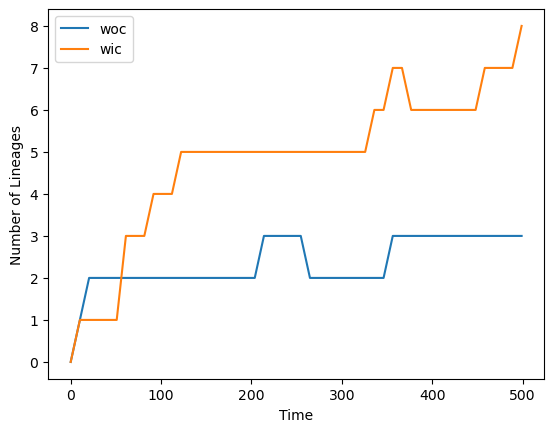

In [22]:
plt.plot(time_steps1, ltt1, label='woc')
plt.plot(time_steps2, ltt2, label='wic')
plt.xlabel('Time')
plt.ylabel('Number of Lineages')
plt.legend()